# Bagging

In [ ]:
#Load Data
from sklearn.datasets import load_digits
digits = load_digits()

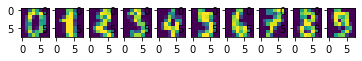

In [ ]:
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [ ]:
#Import lib
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

In [ ]:
#MODELE ARBRE DE DECISION
X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [ ]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7095179233621756


In [ ]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])
    var=np.std(accuracies)
print("la variance de la valeur accuracy sur 100 tirages ",var)

0.688504326328801
0.6835599505562423
0.669344870210136
0.6681087762669963
0.6823238566131026
0.6965389369592089
0.6891223733003708
0.6087762669962917
0.6971569839307787
0.6909765142150803
0.7428924598269468
0.6637824474660075
0.7058096415327565
0.6971569839307787
0.6823238566131026
0.6891223733003708
0.6928306551297899
0.65389369592089
0.6847960444993819
0.6613102595797281
0.6928306551297899
0.7058096415327565
0.695920889987639
0.7027194066749073
0.6953028430160693
0.7082818294190358
0.6705809641532756
0.6977750309023486
0.7095179233621756
0.6829419035846724
0.6835599505562423
0.6823238566131026
0.6569839307787392
0.6872682323856613
0.6940667490729295
0.6817058096415327
0.6749072929542645
0.6650185414091471
0.6569839307787392
0.6971569839307787
0.6965389369592089
0.669344870210136
0.7237330037082819
0.676761433868974
0.7367119901112484
0.7021013597033374
0.6946847960444994
0.7082818294190358
0.6718170580964153
0.6711990111248455
0.6668726823238567
0.7119901112484549
0.646477132262052
0

In [ ]:
#classifieur bagging 
Bclf = BaggingClassifier(tree.DecisionTreeClassifier(),
                        max_samples=0.5, max_features=0.5, n_estimators=200)

In [ ]:
Bclf.fit(X_train,y_train)
Bclf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.7088998763906057


In [ ]:
N = 100
Baccuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
    Bclf = BaggingClassifier(tree.DecisionTreeClassifier(),
                        max_samples=0.5, max_features=0.5, n_estimators=200)
    Bclf.fit(X_train, y_train)
    Z = Bclf.predict(X_test)
    Baccuracies.append(Bclf.score(X_test,y_test))
    print(Baccuracies[i])
    Bvar=np.std(Baccuracies)
print("la variance de la valeur accuracy sur 100 tirages ",Bvar)

0.8943139678615575
0.9066749072929543
0.8912237330037083
0.8788627935723115
0.9023485784919654
0.9184177997527813
0.880716934487021
0.9048207663782447
0.8936959208899876
0.8887515451174289
0.8584672435105068
0.8912237330037083
0.8522867737948084
0.911619283065513
0.896168108776267
0.8671199011124846
0.9103831891223733
0.877008652657602
0.899876390605686
0.8566131025957973
0.8980222496909765
0.9035846724351051
0.8763906056860321
0.8868974042027195
0.880716934487021
0.907292954264524
0.880716934487021
0.9029666254635352
0.8893695920889988
0.8912237330037083
0.9035846724351051
0.8955500618046972
0.877008652657602
0.9085290482076638
0.8943139678615575
0.9054388133498146
0.9029666254635352
0.911619283065513
0.8491965389369592
0.9110012360939431
0.8881334981458591
0.8862793572311496
0.9029666254635352
0.8782447466007417
0.8868974042027195
0.907292954264524
0.8936959208899876
0.9128553770086527
0.8547589616810878
0.8850432632880099
0.904202719406675
0.9011124845488258
0.9140914709517923
0.905

In [ ]:
#Variance*
print(var-Bvar)

0.008527442768488044


In [ ]:
#le graphique accuracy vs n_estimators
Accur=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state=0)
for i in range(2,500,20):
    clf1 = BaggingClassifier(tree.DecisionTreeClassifier(),
                        max_samples=0.5, max_features=0.5, n_estimators=i) 
   
    clf1.fit(X_train, y_train)
    Z = clf1.predict(X_test)
    Accur.append(clf1.score(X_test,y_test))
print(Accur)
    
    

[0.5550061804697157, 0.8498145859085291, 0.8899876390605687, 0.9060568603213844, 0.9029666254635352, 0.9091470951792336, 0.915327564894932, 0.9085290482076638, 0.911619283065513, 0.9165636588380717, 0.904202719406675, 0.907292954264524, 0.9103831891223733, 0.9122373300370828, 0.9122373300370828, 0.9097651421508035, 0.9165636588380717, 0.9110012360939431, 0.9165636588380717, 0.911619283065513, 0.9122373300370828, 0.9177997527812114, 0.9147095179233622, 0.9165636588380717, 0.9103831891223733]


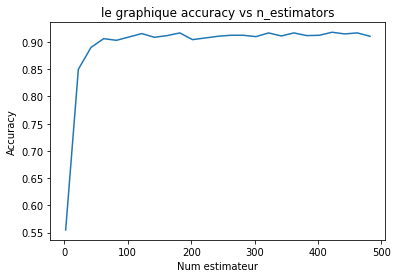

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(2,500,20),Accur)
plt.title("le graphique accuracy vs n_estimators")
plt.xlabel("Num estimateur")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
#GridSearch
from sklearn.model_selection import GridSearchCV
para = {
    'max_features' : [0.2,0.4,0.6,0.8],
    'max_samples' : [0.2,0.4,0.6,0.8]
    }

clf = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=para, cv=5)
clf.fit(X_train,y_train)
print("Meilleur score : " + str(clf.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(clf.best_estimator_.max_samples))
print("max_features: " + str(clf.best_estimator_.max_features))






Meilleur score : 0.8417799752781211
max_samples: 0.8
max_features: 0.8


In [ ]:
print(clf.best_params_)

{'max_features': 0.8, 'max_samples': 0.8}


# **Forêts** **aléatoires**

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.90)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_predi=clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print(accuracy)

0.8714462299134734


In [ ]:
N = 100
Tabaccuracy = []
for i in range(N):
    rclf = RandomForestClassifier(n_estimators=200)
    rclf.fit(X_train, y_train)
    Z = rclf.predict(X_test)
    Tabaccuracy.append(rclf.score(X_test,y_test))
    print(Tabaccuracy[i])
    rvar=np.std(Tabaccuracy)
print("la variance de la valeur accuracy sur 100 tirages ",rvar)

0.8763906056860321
0.8658838071693449
0.8726823238566132
0.8634116192830655
0.8776266996291718
0.8708281829419036
0.8757725587144622
0.8702101359703337
0.8763906056860321
0.8714462299134734
0.877008652657602
0.8757725587144622
0.8689740420271941
0.8640296662546354
0.8720642768850433
0.8640296662546354
0.8683559950556242
0.8683559950556242
0.8683559950556242
0.8739184177997528
0.8708281829419036
0.8745364647713226
0.8689740420271941
0.869592088998764
0.8782447466007417
0.8800988875154512
0.8671199011124846
0.8726823238566132
0.8726823238566132
0.8794808405438813
0.8671199011124846
0.8683559950556242
0.8757725587144622
0.8788627935723115
0.8609394313967862
0.8689740420271941
0.8720642768850433
0.8720642768850433
0.8745364647713226
0.8714462299134734
0.8745364647713226
0.8720642768850433
0.8739184177997528
0.8646477132262052
0.8702101359703337
0.8726823238566132
0.8714462299134734
0.8776266996291718
0.8726823238566132
0.8751545117428925
0.8689740420271941
0.8646477132262052
0.870828182941

In [ ]:
#le graphique accuracy vs n_estimators
Accur=[]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90,random_state=0)
for i in range(2,500,20):
    clf1 = RandomForestClassifier(n_estimators=i) 
    clf1.fit(X_train, y_train)
    Z = clf1.predict(X_test)
    Accur.append(clf1.score(X_test,y_test))
print(Accur)

[0.6291718170580964, 0.9023485784919654, 0.9134734239802225, 0.9227441285537701, 0.9264524103831892, 0.9239802224969098, 0.9245982694684796, 0.9258343634116193, 0.927070457354759, 0.9295426452410384, 0.9326328800988876, 0.9245982694684796, 0.9252163164400494, 0.9245982694684796, 0.9245982694684796, 0.9295426452410384, 0.92336217552534, 0.930778739184178, 0.9301606922126081, 0.9258343634116193, 0.9276885043263288, 0.9258343634116193, 0.9295426452410384, 0.9289245982694685, 0.9320148331273177]


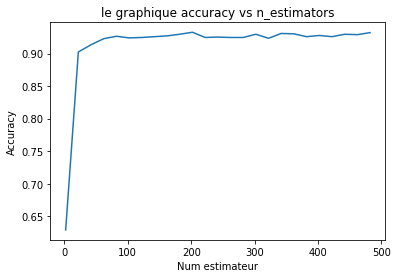

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(2,500,20),Accur)
plt.title("le graphique accuracy vs n_estimators")
plt.xlabel("Num estimateur")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier(n_estimators=200)
clf.fit(X_train,y_train)
predic=clf.predict(X_test)
print("Accuracy:",clf.score(X_test,y_test))

Accuracy: 0.9437577255871447


# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=6),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9054388133498146


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7941903584672435


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=10),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.700247218788628


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=3),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8726823238566132


CHANGER Nombre d'estimateur

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7911001236093943


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
n_estimators=600, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.84610630407911


change rate learning

In [ ]:
# learning_rate=1
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
n_estimators=300, learning_rate=1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.16007416563658838


In [ ]:
# learning_rate=0.5
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
n_estimators=300, learning_rate=0.5)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7985166872682324


In [ ]:
# learning_rate=0.1
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
n_estimators=300, learning_rate=0.1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.8009888751545118
